In [1]:
!pip install prophet


In [2]:
from prophet import Prophet


In [3]:
import pandas as pd

# Assuming the uploaded file is named 'data11.xlsx'
df = pd.read_excel('data11.xlsx')


In [4]:
# Assuming 'Date' is the column containing dates and 'BASEL_temp_mean' is the target variable
df.rename(columns={'Date': 'ds', 'BASEL_temp_mean': 'y'}, inplace=True)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jye84hl/nwlqrhc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jye84hl/u69dv8nu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8696', 'data', 'file=/tmp/tmp0jye84hl/nwlqrhc8.json', 'init=/tmp/tmp0jye84hl/u69dv8nu.json', 'output', 'file=/tmp/tmp0jye84hl/prophet_modeluk1seu_u/prophet_model-20240425175820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:58:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


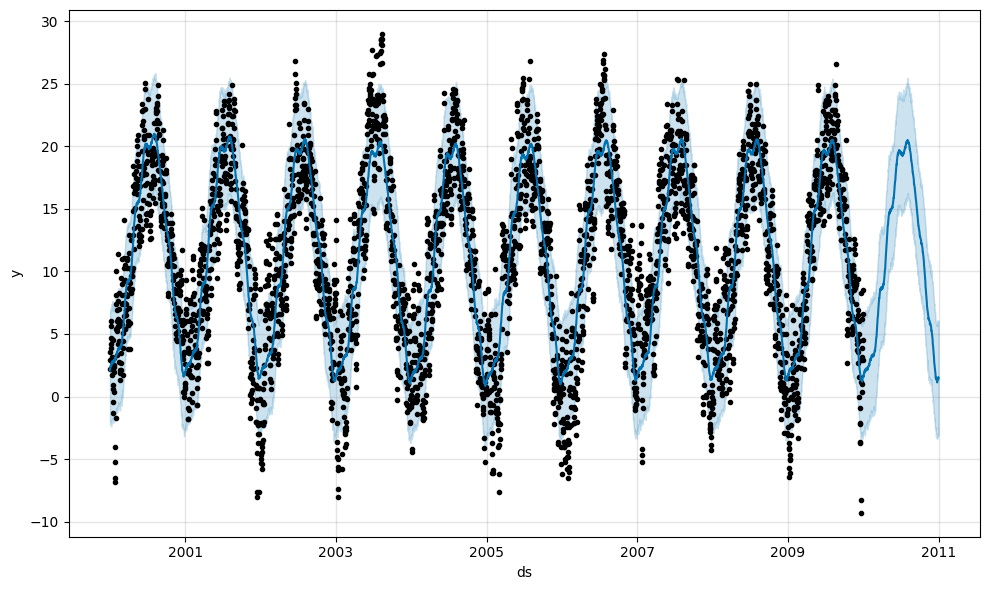

In [5]:

# Create a Prophet model
model = Prophet()

# Fit the model with the prepared DataFrame
model.fit(df)

# Make future predictions (e.g., forecast for the next 365 days)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split data into features (X) and target variable (y)
X = df[['ds']]  # Features (date column)
y = df['y']      # Target variable (temperature)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print the sizes of training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 2923
Testing set size: 731


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jye84hl/uek4itox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jye84hl/d1nmylvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17625', 'data', 'file=/tmp/tmp0jye84hl/uek4itox.json', 'init=/tmp/tmp0jye84hl/d1nmylvp.json', 'output', 'file=/tmp/tmp0jye84hl/prophet_modeljab0kdd1/prophet_model-20240425175833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:58:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error (RMSE): 3.44009023450908


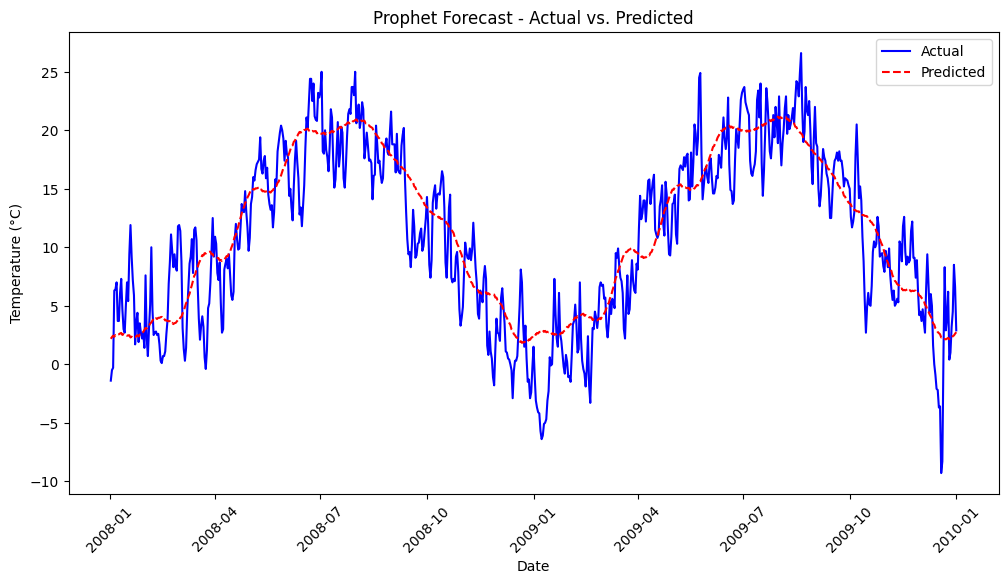

In [9]:
from math import sqrt
import matplotlib.pyplot as plt
from prophet import Prophet

# Create a Prophet model
model = Prophet()

# Fit the model with the training data
train_data = pd.DataFrame({'ds': X_train['ds'], 'y': y_train})
model.fit(train_data)

# Make predictions on the test set
test_data = pd.DataFrame({'ds': X_test['ds']})
forecast = model.predict(test_data)

# Extract predicted values and ground truth
y_pred = forecast['yhat'].values
y_true = y_test.values

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Convert datetime column to pandas datetime format if not already
test_data['ds'] = pd.to_datetime(test_data['ds'])

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_true, label='Actual', color='blue')
plt.plot(test_data['ds'], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Prophet Forecast - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()
